In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [19]:
train_dir = './horse-or-human'
validation_dir = './validation-horse-or-human'
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(300,300),batch_size=128,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(300,300),batch_size=128,class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(300,300,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 128)      

In [22]:
model.compile(optimizer='adam',metrics=['acc'],loss='binary_crossentropy')

In [24]:
history = model.fit_generator(train_generator,steps_per_epoch=8,epochs=5,validation_data=validation_generator,validation_steps=8,
                             )

Epoch 1/5
8/8 [==============================] - 108s 14s/step - loss: 1.3958 - acc: 0.5406 - val_loss: 0.6267 - val_acc: 0.5000
Epoch 2/5
8/8 [==============================] - 101s 13s/step - loss: 0.5221 - acc: 0.7653 - val_loss: 0.6585 - val_acc: 0.6133
Epoch 3/5
8/8 [==============================] - 99s 12s/step - loss: 0.2606 - acc: 0.8988 - val_loss: 0.7516 - val_acc: 0.7852
Epoch 4/5
8/8 [==============================] - 107s 13s/step - loss: 0.1193 - acc: 0.9590 - val_loss: 0.8997 - val_acc: 0.7422
Epoch 5/5
8/8 [==============================] - 99s 12s/step - loss: 0.2083 - acc: 0.9611 - val_loss: 1.1428 - val_acc: 0.7070


In [32]:
model.layers[:8]

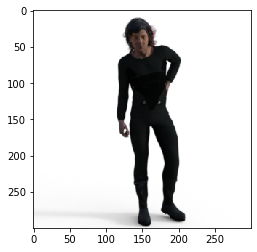

In [40]:
#visualizing features extracted from intermediate layers for a random image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
img_path = "./validation-horse-or-human/humans/valhuman05-16.png"
img = load_img(img_path,target_size=(300,300))
x = img_to_array(img)
x=x.reshape((1,)+x.shape)
x=x/255
x.shape
plt.imshow(x[0])


In [37]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)

activations = activation_model.predict(x)

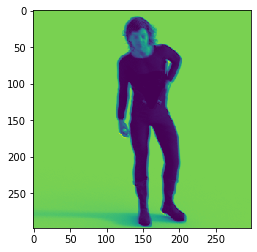

In [86]:
activations[0].shape
plt.imshow(activations[0][0,:,:,3])

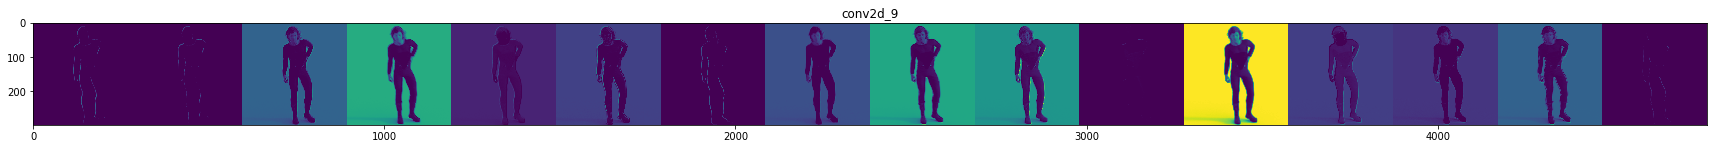

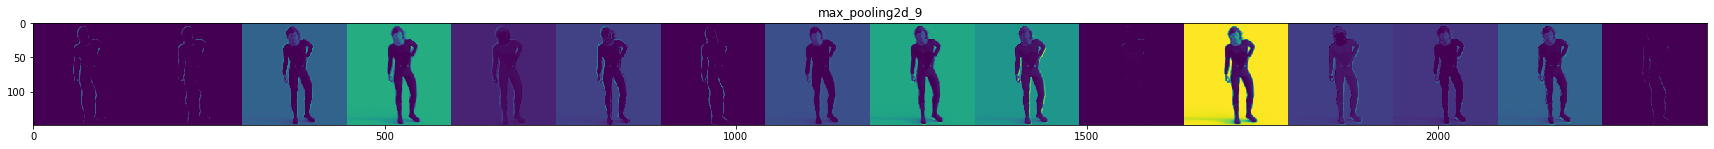

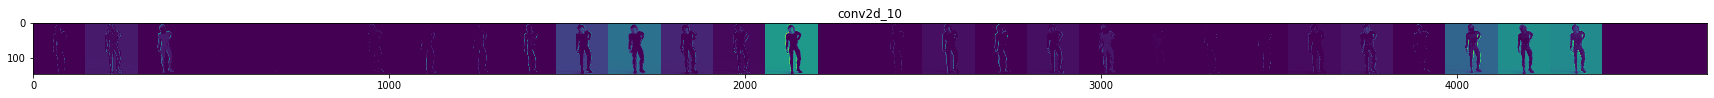

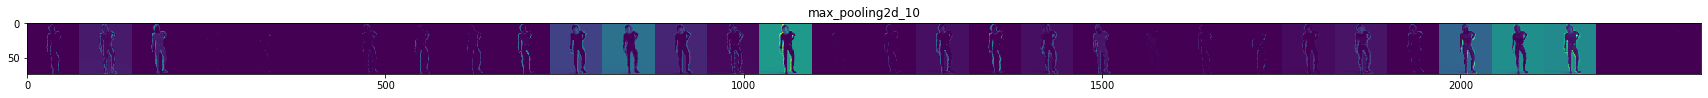

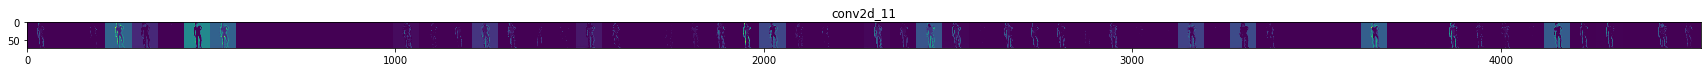

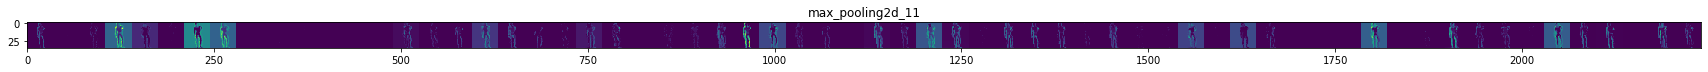

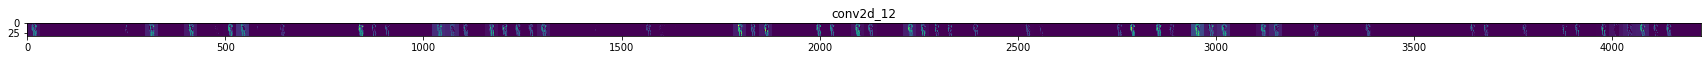

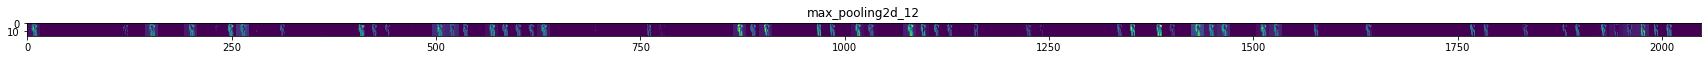

In [90]:
#for activation in activations:
    
layer_names = [layer.name for layer in model.layers[:8]]

for layer_name,activation in zip(layer_names,activations):
    n_features = activation.shape[-1]
    size = activation.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x=activation[0,:,:,i]
        display_grid[:, i * size : (i + 1) * size] = x
    scale = 30/ n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    